# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [9]:
# Ajustando o modelo de regressão:
model = smf.ols('tip ~ net_bill', data=tips).fit()

# Mostrando o resumo do modelo:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        10:55:19   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

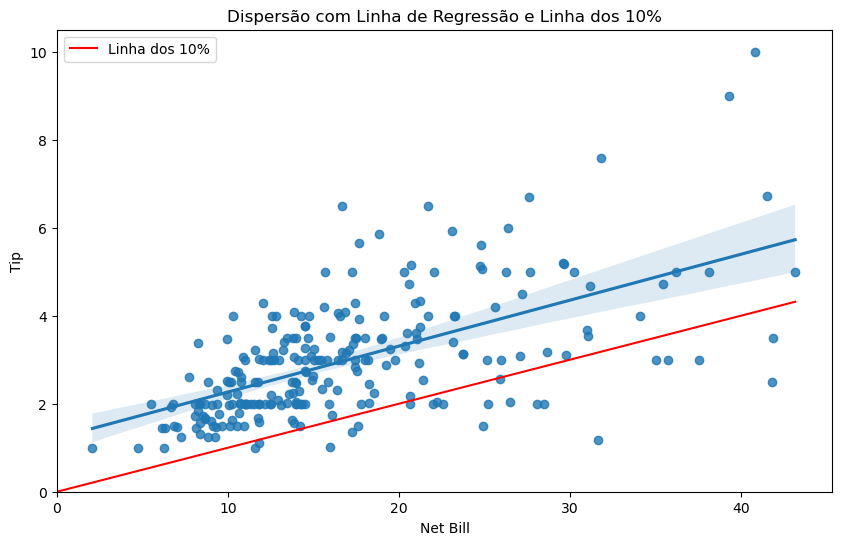

In [19]:
# Gráfico de dispersão com linha de regressão:
plt.figure(figsize=(10, 6))
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct'] < 0.5])

# Gerando dados para a linha dos 10%:
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

# Plotando a linha dos 10%:
plt.plot(x, y, '-r', label='Linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico:
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionando rótulos e título:
plt.title('Dispersão com Linha de Regressão e Linha dos 10%')
plt.xlabel('Net Bill')
plt.ylabel('Tip')
plt.legend()

# Mostrando o gráfico:
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [23]:
# Ajustando o modelo de regressão:
model = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Mostrando o resumo do modelo:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        11:07:35   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

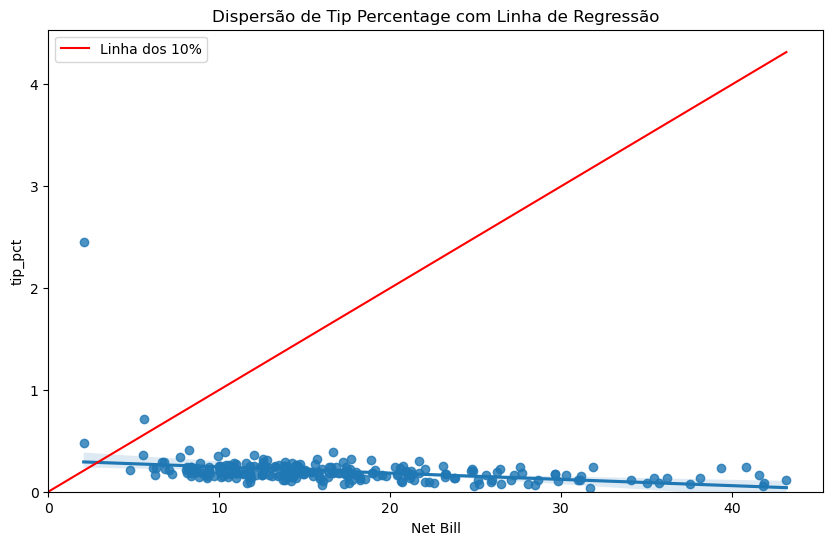

In [31]:
# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(y='tip_pct', x='net_bill', data=tips)

# Gerar dados para a linha dos 10% (ou qualquer linha de referência desejada)
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

# Plotar a linha dos 10%
plt.plot(x, y, '-r', label='Linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionar rótulos e título
plt.title('Dispersão de Tip Percentage com Linha de Regressão')
plt.xlabel('Net Bill')
plt.ylabel('tip_pct')
plt.legend()

# Mostrar o gráfico
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Análise:

##### No primeiro gráfico temos uma relação moderada entre as variáveis. No segundo gráfico temos uma relação fraca entre as variáveis, portanto a variável independente não é um bom preditor da variável dependente.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [41]:
# Ajustando o modelo de regressão para tip_pct:
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Obtendo valores preditivos para tip_pct:
tips['pred_tip_pct'] = model_tip_pct.fittedvalues

# Calculando os valores preditivos para tip a partir de tip_pct:
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Ajustando o modelo de regressão para tip:
model_tip = smf.ols('tip ~ net_bill', data=tips).fit()

# Calculando o R² do modelo para tip:
r_squared_tip = model_tip.rsquared

# Mostrando o resumo do modelo de tip:
model_tip.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        11:20:16   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Mostrando o R² do modelo de tip:
print(f'R² do modelo para tip: {r_squared_tip}')

# Comparando com o R² do item 1:
r_squared_item_1 = 0.333 
print(f'Comparação do R²: Modelo ajustado no item 4 = {r_squared_tip}, Item 1 = {r_squared_item_1}')

R² do modelo para tip: 0.3325407312323705
Comparação do R²: Modelo ajustado no item 4 = 0.3325407312323705, Item 1 = 0.333


### Visualizando em gráficos para comparações:

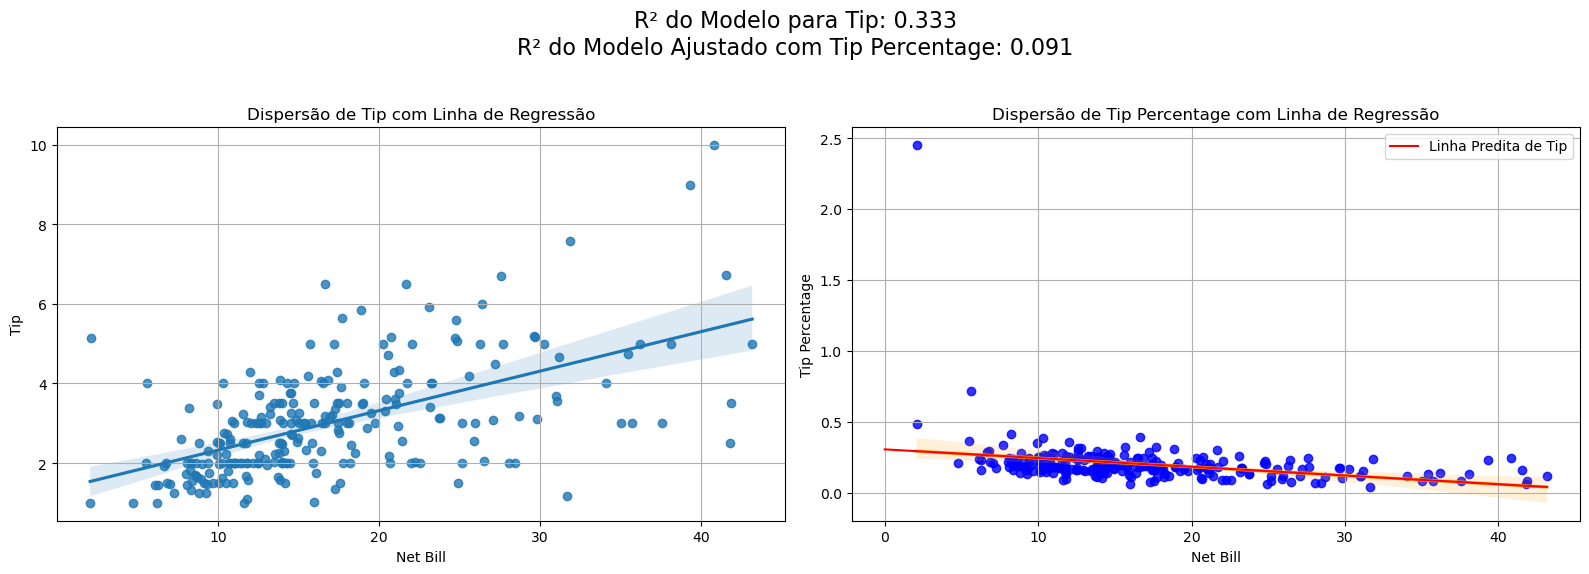

In [54]:
# Configurando os gráficos:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dispersão e Linha de Regressão para tip explicado por net_bill:
sns.regplot(x='net_bill', y='tip', data=tips, ax=ax[0])
ax[0].set_title('Dispersão de Tip com Linha de Regressão')
ax[0].set_xlabel('Net Bill')
ax[0].set_ylabel('Tip')
ax[0].grid(True)

# Gráfico 2: Dispersão e Linha de Regressão para tip_pct explicado por net_bill:
sns.regplot(x='net_bill', y='tip_pct', data=tips, ax=ax[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
# Plotar a linha predita para tip
x = np.linspace(0, tips['net_bill'].max(), 100)
y = model_tip_pct.params.Intercept + model_tip_pct.params.net_bill * x
ax[1].plot(x, y, '-r', label='Linha Predita de Tip')
ax[1].set_title('Dispersão de Tip Percentage com Linha de Regressão')
ax[1].set_xlabel('Net Bill')
ax[1].set_ylabel('Tip Percentage')
ax[1].legend()
ax[1].grid(True)

# Adicionar comparativo do R² ao gráfico:
fig.suptitle(f'R² do Modelo para Tip: {model_tip.rsquared:.3f}\nR² do Modelo Ajustado com Tip Percentage: {model_tip_pct.rsquared:.3f}', fontsize=16)

# Ajustando layout e mostrar gráficos:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Vemos nos gráficos e nos valores de $R^2$ a proximidade e consistência para a utilização do modelo.